In [1]:
import os
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
import numpy as np
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical

import keras
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd

C:\Users\santh\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [21]:
filename = 'recordings/0_jackson_2.wav'

In [24]:
#plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
#librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [4]:
sample_rate

22050

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import load_img, img_to_array

In [6]:
imagesDir = "resizeimage/"
trainset = [] # Creating two sets (train and test) 
testset = []
for file in os.listdir(imagesDir):
    
    label = file.split('_')[0]
    sample_number = file.split('_')[2]
    img = load_img(imagesDir+file)
    if sample_number in ['0.jpg','1.jpg','2.jpg','3.jpg','4.jpg']:
        testset.append([img_to_array(img), label])
    else:
        trainset.append([img_to_array(img), label])

In [7]:
len(os.listdir(imagesDir))

1500

In [8]:
np.random.shuffle(trainset)
np.random.shuffle(testset)

In [9]:
# Get only images in the train list not the Labels
X_train = [item[0] for item in trainset]
# Get only Labels in the train list not the images
y_train = [item[1] for item in trainset]
# Get only images in the test list not the Labels
X_test = [item[0] for item in testset]
# Get only Labels in the test list not the images
y_test = [item[1] for item in testset]

In [11]:
X_train.shape

(1350, 62, 62, 3)

In [12]:
y_train.shape

(1350,)

In [13]:
X_test.shape

(150, 62, 62, 3)

In [10]:
# Convert list to numpy array in order to define input shape
X_train = np.asanyarray(X_train)
y_train = np.asanyarray(y_train)
X_test = np.asanyarray(X_test)
y_test = np.asanyarray(y_test)

In [14]:
# convert to one hot representation
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Normalize the images
X_train /= 255
X_test /= 255

In [15]:
from keras.models import Sequential 
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import models
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
import test

In [16]:
data_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
def cnn():
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=data_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
    return model

In [17]:
model = cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 32)        416       
                                                                 
 batch_normalization (BatchN  (None, 61, 61, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 48)        6192      
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 48)       192       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 120)       23160     
                                                                 
 batch_normalization_2 (Batc  (None, 59, 59, 120)      4

In [38]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split=0.2, epochs = 100, verbose = 1)

Epoch 1/100
22/22 [==============================] - 48s 2s/step - loss: 3.2602 - accuracy: 0.1380 - val_loss: 2.3061 - val_accuracy: 0.1333
Epoch 2/100
22/22 [==============================] - 49s 2s/step - loss: 2.7601 - accuracy: 0.1750 - val_loss: 2.3309 - val_accuracy: 0.1185
Epoch 3/100
22/22 [==============================] - 48s 2s/step - loss: 2.4487 - accuracy: 0.2491 - val_loss: 2.3559 - val_accuracy: 0.1185
Epoch 4/100
22/22 [==============================] - 50s 2s/step - loss: 2.2890 - accuracy: 0.2870 - val_loss: 2.3739 - val_accuracy: 0.1296
Epoch 5/100
22/22 [==============================] - 48s 2s/step - loss: 2.0835 - accuracy: 0.3315 - val_loss: 2.3800 - val_accuracy: 0.1630
Epoch 6/100
22/22 [==============================] - 48s 2s/step - loss: 1.8799 - accuracy: 0.3611 - val_loss: 2.3699 - val_accuracy: 0.1667
Epoch 7/100
22/22 [==============================] - 48s 2s/step - loss: 1.7968 - accuracy: 0.3972 - val_loss: 2.3547 - val_accuracy: 0.2259
Epoch 8/100
2

Epoch 59/100
22/22 [==============================] - 27s 1s/step - loss: 0.3829 - accuracy: 0.9213 - val_loss: 0.1970 - val_accuracy: 0.9667
Epoch 60/100
22/22 [==============================] - 27s 1s/step - loss: 0.3923 - accuracy: 0.9148 - val_loss: 0.1923 - val_accuracy: 0.9704
Epoch 61/100
22/22 [==============================] - 26s 1s/step - loss: 0.3640 - accuracy: 0.9120 - val_loss: 0.1879 - val_accuracy: 0.9667
Epoch 62/100
22/22 [==============================] - 28s 1s/step - loss: 0.3721 - accuracy: 0.9148 - val_loss: 0.1895 - val_accuracy: 0.9667
Epoch 63/100
22/22 [==============================] - 25s 1s/step - loss: 0.3737 - accuracy: 0.9102 - val_loss: 0.1846 - val_accuracy: 0.9667
Epoch 64/100
22/22 [==============================] - 26s 1s/step - loss: 0.3893 - accuracy: 0.9028 - val_loss: 0.1791 - val_accuracy: 0.9593
Epoch 65/100
22/22 [==============================] - 26s 1s/step - loss: 0.3503 - accuracy: 0.9185 - val_loss: 0.1783 - val_accuracy: 0.9630
Epoch 

In [39]:
model.save("model2")

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


In [18]:
model = keras.models.load_model("model2")

In [40]:
results = model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 204ms/step - loss: 0.1154 - accuracy: 0.9867


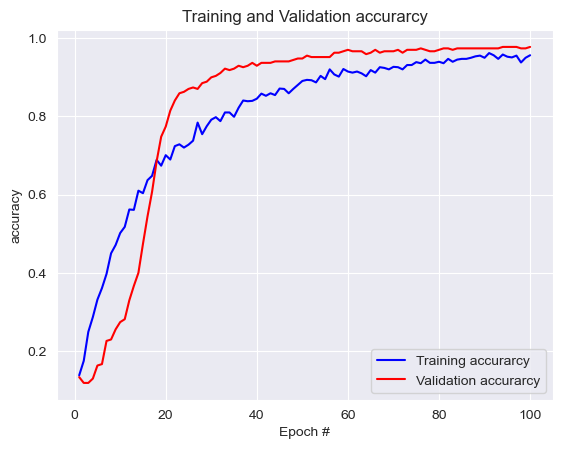

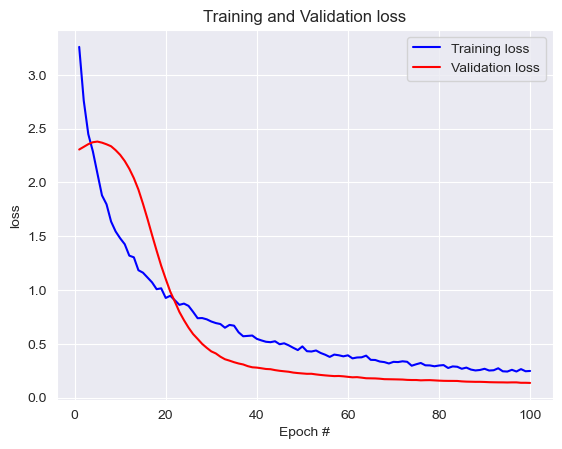

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()

In [42]:
Y_pred1 = model.predict(X_test, len(y_test)//32)
y_pred1 = np.argmax(Y_pred1, axis=1)
rounded_labels = np.argmax(y_test, axis=1)

38/38 [==============================] - 2s 37ms/step


In [43]:
print('Confusion Matrix')
cm = confusion_matrix(rounded_labels, y_pred1)
#cm = confusion_matrix(test_RGB_y, y_pred1)
print(cm)

Confusion Matrix
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  1  0  0  0  1 13  0]
 [ 0  0  0  0  0  0  0  0  0 15]]


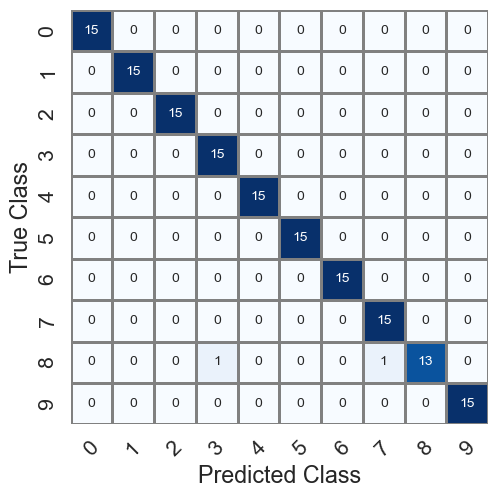

In [51]:
array_downsize_upsize_random = cm

class_labels=["0", "1","2","3","4","5","6","7","8","9"]

confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 45)#, fontsize = 1)
# accuracy = np.trace(array_downsize_upsize_random) / np.sum(array_downsize_upsize_random).astype('float')
# misclass = 1 - accuracy
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#plt.savefig('Downsize+Upsize_Random.png')#, dpi = 1200)
plt.show()

In [52]:
print("sravya")

sravya


In [56]:
index = 11
print('True number',np.argmax(y_test[index]))
print('Predicted number:' ,np.argmax(model.predict(X_test[index].reshape(1,62,62,3))))

True number 7
1/1 [==============================] - 0s 25ms/step
Predicted number: 7


In [62]:
index = 34
print('True number',np.argmax(y_test[index]))
print('Predicted number:' ,np.argmax(model.predict(X_test[index].reshape(1,62,62,3))))

True number 4
1/1 [==============================] - 0s 55ms/step
Predicted number: 4


In [98]:
X_test[11].shape

(62, 62, 3)

In [93]:
#import speech_recognition as sr

In [94]:
#r = sr.Recognizer()

In [97]:
#with sr.Microphone() as source:
    # read the audio data from the default microphone
#    print("say something")
#    audio_data = r.record(source, duration=5)
#    print("Recognizing...")
    # convert speech to text
#    try:
#        text = r.recognize_google(audio_data)
#        print("you said : ",text)
#    except:
#        print("Sorry could not recognize what you said")

In [98]:
#print(type(audio_data))

In [96]:
#with open("microphone-results1.wav", "wb") as f:
#    f.write(audio_data.get_wav_data())
#recordings/6_jackson_22.wav

In [19]:
x, sr = librosa.load("recordings/6_jackson_22.wav")


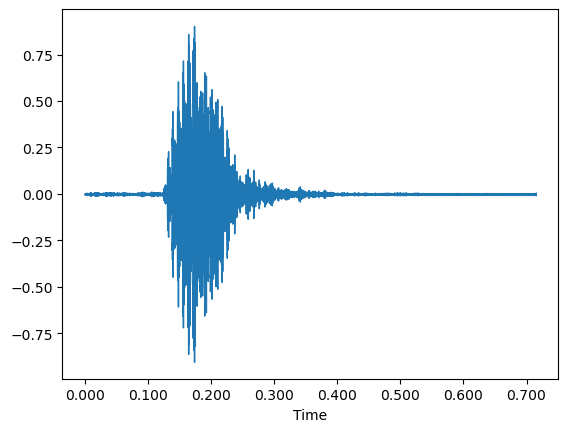

In [20]:
librosa.display.waveshow(x,sr=sr)
ipd.Audio("recordings/6_jackson_22.wav")

In [116]:
import matplotlib.pyplot as plt

In [117]:
S = librosa.feature.melspectrogram(y=x, sr=sr)
print(S.shape)
fig = plt.figure(figsize=[1,1])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),ax=ax, x_axis='time', y_axis='mel')
file="6_1_img"+".jpg"
plt.savefig(file, bbox_inches='tight',pad_inches=0)
plt.close()

(128, 31)


In [118]:
from PIL import Image

#read the image
im = Image.open("6_1_img.jpg")
print(im.size)

(77, 77)


In [119]:
new_img=im.resize((62, 62))

In [120]:
k=[]
k.append(img_to_array(new_img))

In [121]:
k[0].shape

(62, 62, 3)

In [122]:
#print('True number',np.argmax(y_test[index]))
print('Predicted number:' ,np.argmax(model.predict(k[0].reshape(1,62,62,3))))

1/1 [==============================] - 0s 31ms/step
Predicted number: 6


In [123]:
def word_form(numeric):
    if numeric == 0:
        return 'zero'
    elif numeric == 1:
        return 'one'
    elif numeric == 2:
        return 'two'
    elif numeric == 3:
        return 'three'
    elif numeric == 4:
        return 'four'
    elif numeric == 5:
        return 'five'
    elif numeric == 6:
        return 'six'
    elif numeric == 7:
        return 'seven'
    elif numeric == 8:
        return 'eight'
    elif numeric == 9:
        return 'nine'

In [124]:
print(word_form(np.argmax(model.predict(k[0].reshape(1,62,62,3)))))

1/1 [==============================] - 0s 26ms/step
six
